<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/5_Computer_Vision_and_Convolution_Neural_Networks_In_Tensorflow/1_Computer_Vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolution neural network (CNN) - TinyVGG Architecture (note there are many ways you can stack layers in CNN).
* We might see tf.keras.layers.Sequential, Conv2D (two dimensional data), MaxPool2D
* Input layer <== Images (batch size, image height, image width, color_channels)
* Convolution layer ConvXD <== Same parameters as above without input shape. Extracts and learns from the images (X can be 1, 2, 3)
* Hidden activation : Non linear activation function (ReLU). Adds non linearity to the features.
* MaxPoold2D : Reduces the dimensionality of learned image features.
* Fully Connected layer: Further refines learned features from convolution layers.
*Output activation : Adds non liniearity to the output layer.

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 549.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


In [2]:
# Computer vision is a practice of writing algorithms which can discover patters in visual data. Such as camera, self driving car recognizing the car in front.

**Get Data**

# The images we are working are from https://www.kaggle.com/datasets/dansbecker/food-101?resource=download
# However we modified it to use two classes pizza and steak https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip (Derived from https://github.com/murali-marimekala/tensorflow-deep-learning)


In [3]:

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-04-23 02:38:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   237MB/s    in 0.4s    

2025-04-23 02:38:16 (237 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine leanring project i s becoming one with the data.

And for a computer vision project this usually means visualizing many spamples of your data

In [4]:
!ls pizza_steak/train


pizza  steak


In [5]:
!ls pizza_steak/train/*

pizza_steak/train/pizza:
1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  6256

In [6]:
import os

#Walk through pizzasteak directory and list the number of files
for dirpath, dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} and images in '{dirpath}'.")

There are 2 directories and 0 and images in 'pizza_steak'.
There are 2 directories and 0 and images in 'pizza_steak/train'.
There are 0 directories and 750 and images in 'pizza_steak/train/steak'.
There are 0 directories and 750 and images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 and images in 'pizza_steak/test'.
There are 0 directories and 250 and images in 'pizza_steak/test/steak'.
There are 0 directories and 250 and images in 'pizza_steak/test/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 23 02:38 .
drwxr-xr-x 1 root root 4096 Apr 23 02:38 ..
drwxr-xr-x 4 root root 4096 Apr 23 02:38 test
drwxr-xr-x 4 root root 4096 Apr 23 02:38 train


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To Visualize our images, first get the class names programatically

In [9]:
#Get the class name programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob('*'))) #Create the list of class names from the sub directory
print(class_names)

['pizza' 'steak']


In [10]:
#Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set the target directory (we will view images from here)
  target_folder = target_dir + target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it matplot lib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img


['3531805.jpg']
Image shape: (512, 512, 3)


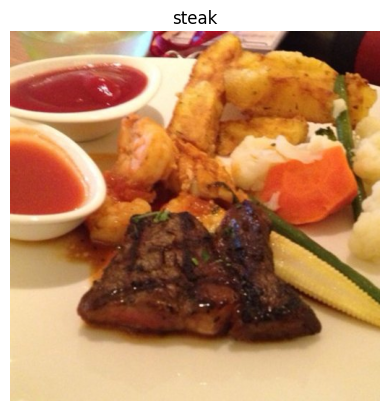

In [11]:
# View a random image from training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

## An  end-to-end example

Lets build a CNN to find patterns in our images. Most specifically , we need a way to
* load our images
* preprocess our image,
* Build CNN to find patterns in our images
* Compile and Fit CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Pre process data (called scaling / normalization. values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=42)
# Buid a CNN model (Same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5570 - loss: 0.7141 - val_accuracy: 0.7680 - val_loss: 0.4712
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7636 - loss: 0.4871 - val_accuracy: 0.8520 - val_loss: 0.3665
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8245 - loss: 0.3996 - val_accuracy: 0.8460 - val_loss: 0.3567
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8194 - loss: 0.3930 - val_accuracy: 0.8540 - val_loss: 0.3521
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8620 - loss: 0.3404 - val_accuracy: 0.8720 - val_loss: 0.3267


In [13]:
len(train_data)

47

* CPU took 136 seconds with CPU.
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.5894 - loss: 0.6817 - val_accuracy: 0.7500 - val_loss: 0.4734

*Enabled runtime GPU acceleration in colab. It took around 17 seconds
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.5894 - loss: 0.6817 - val_accuracy: 0.7500 - val_loss: 0.4734



In [14]:
# Get model 1 summary

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 240, 240, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 116, 116, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33640)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        33,641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,955 (429.52 KB)

 Trainable params: 36,651 (143.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,304 (286.35 KB)

🌪 Check https://poloclub.github.io/cnn-explainer/

# Use same model as before

Lets replicate the model we have built in a preivouis section to see if it works with our image data. Model we are building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=4,2&seed=0.70420&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


In [16]:
# Use the same model as before


#Set random seed
tf.random.set_seed(42)

#Create a model to repliace the tensorflow playground model.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(244,244,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.5059 - loss: 1.0705 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.4957 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5086 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.4960 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 240, 240, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 116, 116, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33640)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        33,641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,955 (429.52 KB)

 Trainable params: 36,651 (143.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,304 (286.35 KB)

In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 178608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       714,436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,143,385 (8.18 MB)

 Trainable params: 714,461 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,428,924 (5.45 MB)

In [19]:
#Despite having 20x more parameters than our CNN(model_1), model_2 perform terribly lets improve it.

#Set random seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(244, 244, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 729ms/step - accuracy: 0.6028 - loss: 6.7013 - val_accuracy: 0.7900 - val_loss: 0.4954
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 721ms/step - accuracy: 0.7361 - loss: 0.8122 - val_accuracy: 0.6080 - val_loss: 1.2960
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 714ms/step - accuracy: 0.6826 - loss: 1.3687 - val_accuracy: 0.7700 - val_loss: 0.4967
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 715ms/step - accuracy: 0.6887 - loss: 0.8360 - val_accuracy: 0.7060 - val_loss: 0.7392
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 716ms/step - accuracy: 0.7340 - loss: 0.6544 - val_accuracy: 0.5660 - val_loss: 0.9531


In [20]:
#Get summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 178608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    17,860,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,643,605 (204.63 MB)

 Trainable params: 17,881,201 (68.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,762,404 (136.42 MB)

## Binary Classificaiton :Lets break it down

1. Become one with the data (visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, the main step here was scaling/nomalizing).
3. Created a model (start with a baseline).
4.Fit the model
5.Evaluate the model
6.Adjust different parameters and improve the mode (try to beat our baseline).
7.Repeat untill satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3623556.jpg']
Image shape: (288, 512, 3)
['1110966.jpg']
Image shape: (512, 512, 3)


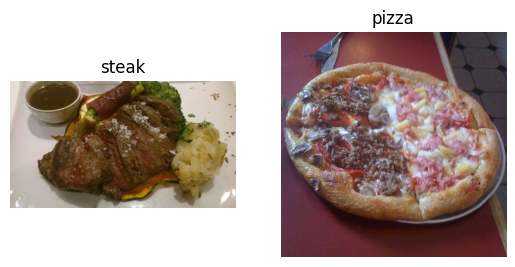

In [21]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory data paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [25]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. TRying to learn the pattern in 10,000 in one hit could result in the model not being able to learn very well.

Why 32 ?
Because 32 is recommended by Yaun LeCun.

In [23]:
# Create train and test data generators and rescale the data.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [30]:
#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #Target dir of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", #Type of data you are working with
                                               batch_size=32) #Size of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
# Get a sample of a train data batch
images, labels = next(train_data) # Get next batch of images/labels in train data using next()
len(images), len(labels)

(32, 32)

In [33]:
#How many bathces are there ?
len(train_data)

47

In [34]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [35]:
images[7]

array([[[0.2784314 , 0.21960786, 0.20784315],
        [0.3254902 , 0.2627451 , 0.2627451 ],
        [0.36078432, 0.29803923, 0.29803923],
        ...,
        [0.3137255 , 0.3529412 , 0.32156864],
        [0.11764707, 0.19607845, 0.15294118],
        [0.11764707, 0.21176472, 0.15686275]],

       [[0.30588236, 0.24705884, 0.23529413],
        [0.3372549 , 0.27450982, 0.27450982],
        [0.36862746, 0.30588236, 0.30980393],
        ...,
        [0.24705884, 0.28627452, 0.25490198],
        [0.34117648, 0.40784317, 0.36862746],
        [0.21568629, 0.3019608 , 0.25490198]],

       [[0.3019608 , 0.24705884, 0.23529413],
        [0.32941177, 0.27450982, 0.27058825],
        [0.3529412 , 0.29803923, 0.29803923],
        ...,
        [0.18431373, 0.21176472, 0.18431373],
        [0.14509805, 0.19607845, 0.16078432],
        [0.30980393, 0.38823533, 0.34509805]],

       ...,

       [[0.32941177, 0.26666668, 0.16862746],
        [0.34117648, 0.27058825, 0.1764706 ],
        [0.3372549 , 0

In [36]:
images[7].shape

(224, 224, 3)

In [37]:
#view the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)